In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.2 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

In [ ]:
df = pd.read_csv("aggreg_data_LE.csv")
print(df)

      Unnamed: 0      Country  Year      Status  Life expectancy   \
0              0  Afghanistan  2015  Developing              65.0   
1              1  Afghanistan  2014  Developing              59.9   
2              2  Afghanistan  2013  Developing              59.9   
3              3  Afghanistan  2012  Developing              59.5   
4              4  Afghanistan  2011  Developing              59.2   
...          ...          ...   ...         ...               ...   
2933        2933     Zimbabwe  2004  Developing              44.3   
2934        2934     Zimbabwe  2003  Developing              44.5   
2935        2935     Zimbabwe  2002  Developing              44.8   
2936        2936     Zimbabwe  2001  Developing              45.3   
2937        2937     Zimbabwe  2000  Developing              46.0   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0               263.0             62     0.01               10.105348   
1               271.0    

In [ ]:
df.describe()

,Unnamed: 0,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2870.000000,2385.000000,2938.000000,2904.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,1468.500000,2007.518720,69.224932,164.796448,30.303948,4.602861,8.063625,80.940461,2419.592240,38.321247,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,848.271871,4.613841,9.523867,124.292079,117.926501,4.052413,42.729997,25.070016,11467.272489,20.044034,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,0.000000,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,734.250000,2004.000000,63.100000,74.000000,0.000000,0.877500,3.243931,77.000000,0.000000,19.300000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,1468.500000,2008.000000,72.100000,144.000000,3.000000,3.755000,5.132790,92.000000,17.000000,43.500000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2202.750000,2012.000000,75.700000,228.000000,22.000000,7.702500,7.513483,97.000000,360.250000,56.200000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2937.000000,2015.000000,89.000000,723.000000,1800.000000,17.870000,1275.877569,99.000000,212183.000000,87.300000,...,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
df.isnull().sum()

Unnamed: 0                           0
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure              68
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
#as 10 life-expectancy values are missing,those corresponding rows are dropped
del df[df.columns[0]]
df = df.dropna(subset=['Life expectancy '])
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure              68
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [ ]:
df.groupby('Country').apply(lambda x:x["Hepatitis B"].interpolate(method='linear', limit_direction='both', axis=0))[55:65]

Country                
Angola               55    69.0
                     56    73.0
                     57    73.0
                     58    73.0
                     59    73.0
                     60    73.0
                     61    73.0
                     62    73.0
                     63    73.0
Antigua and Barbuda  64    99.0
Name: Hepatitis B, dtype: float64

In [ ]:
df.loc[:, "Polio"]=df.groupby('Country')["Polio"].transform(lambda x: x.interpolate(method='linear', limit_direction='both', axis=0))
df.loc[:, "Hepatitis B"]=df.groupby('Country')["Hepatitis B"].transform(lambda x: x.interpolate(method='linear', limit_direction='both', axis=0))
df.loc[:, "Diphtheria "]=df.groupby('Country')["Diphtheria "].transform(lambda x: x.interpolate(method='linear', limit_direction='both', axis=0))
df.loc[:, "percentage expenditure"]=df.groupby('Country')["percentage expenditure"].transform(lambda x: x.interpolate(method='linear', limit_direction='both', axis=0))
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure              32
Hepatitis B                        144
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                           0
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [ ]:
for i in df.columns[3:]:
  df.loc[:, i]=df.groupby('Country')[i].transform(lambda x: x.interpolate(method='linear', limit_direction='both', axis=0))
  df[i]=df[i].fillna(0)
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
print(df.shape)

(2928, 22)


In [ ]:
#Removing data of 'Cook Islands', 'Niue', 'Slovakia', 'Swaziland' as it has inaccurate data
df=df[df["Country"] != 'Swaziland']
df=df[df["Country"] != 'Niue']
df=df[df["Country"] != 'Slovakia']
df=df[df["Country"] != 'Cook Islands']
print(df.shape)

(2896, 22)


In [ ]:
#exp = pd.read_csv("expenditure.csv")


In [ ]:
no_of_unique_years=pd.value_counts(df.Year)
no_of_unique_countries=pd.value_counts(df.Country)
print("The survey is done over ",len(no_of_unique_years),"years and over ",len(no_of_unique_countries),"countries")
#since its no of years is less=>easier to obtain global trend over a year

The survey is done over  16 years and over  181 countries


[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015] 16


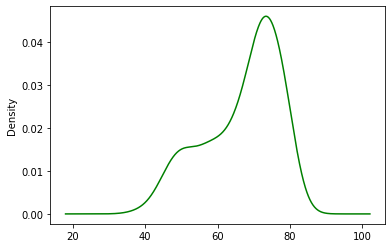

In [ ]:
years = df['Year'].unique().tolist()   #find unique values
years.sort()
print(years,len(years))
#Year 2000 Analysis
yr_2000 = df[df['Year']==years[0]]
yr_2000['Life expectancy '].plot.density(color='green')


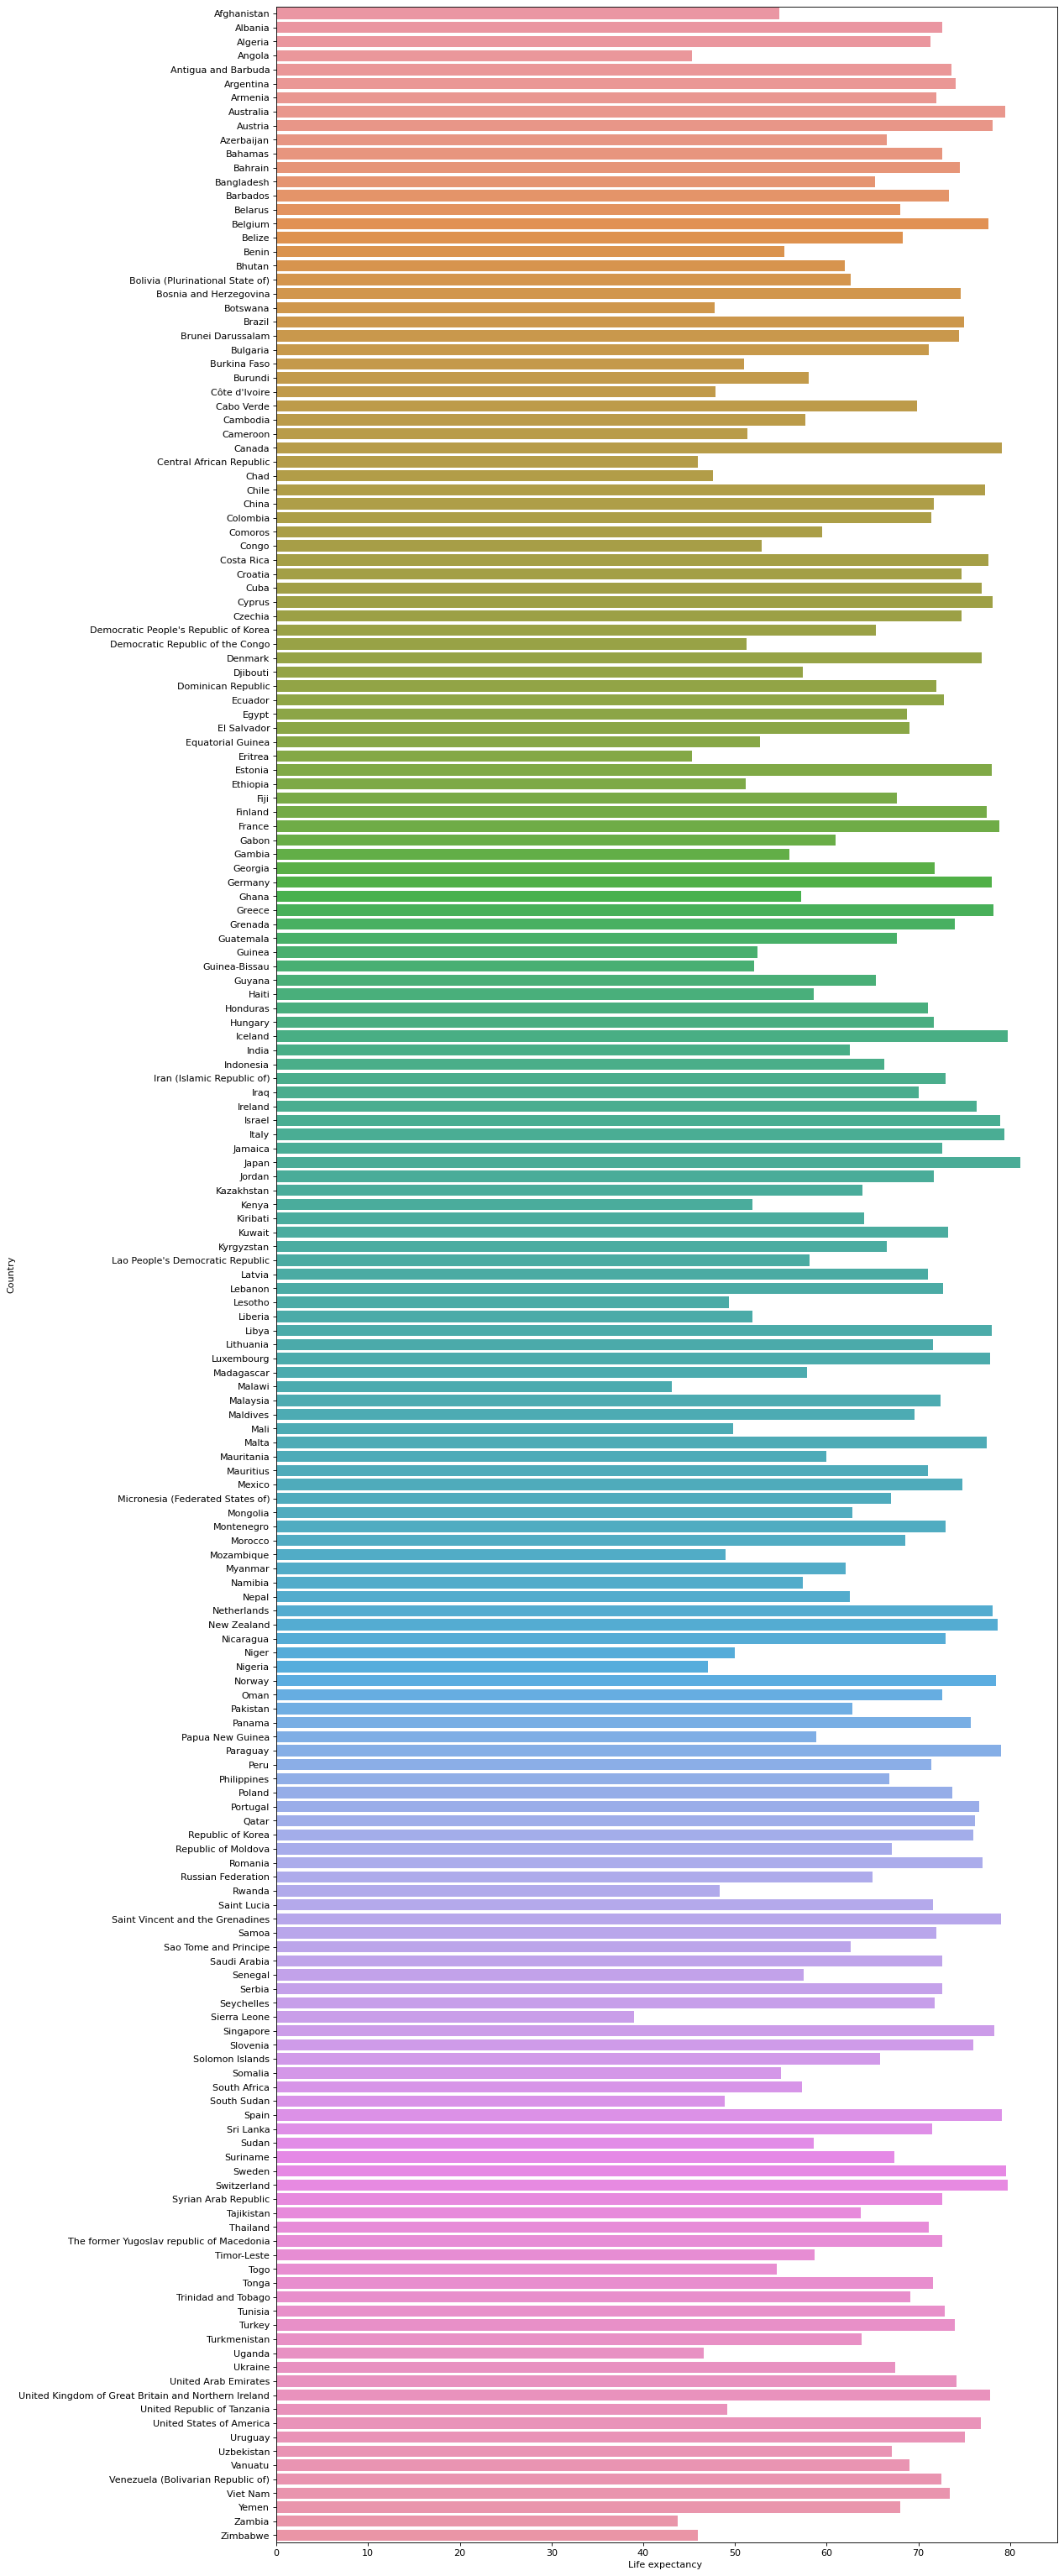

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(15,50), dpi=80, facecolor='w', edgecolor='r')
sns.barplot(x=yr_2000['Life expectancy '], y =yr_2000['Country'])

In [ ]:
yr_2000.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,181.0,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,1.810000e+02,181.000000,181.000000,181.000000,181.000000
mean,2000.0,66.817127,179.707182,37.939227,4.495138,6.984972,57.348066,4715.270718,34.250276,54.292818,75.458564,5.503702,72.895028,2.301105,4014.603156,7.457580e+06,5.086740,5.182320,0.482519,9.924309
std,0.0,10.251021,138.520626,150.063696,3.944016,31.091501,35.466813,17868.122710,19.058581,210.727648,28.172183,2.206343,29.991759,6.196388,8627.214946,2.371210e+07,4.748116,5.009182,0.301133,4.664674
min,2000.0,39.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2000.0,58.700000,84.000000,0.000000,1.210000,2.948944,22.000000,0.000000,16.500000,1.000000,63.000000,4.130000,57.000000,0.100000,153.259487,6.476000e+03,1.600000,1.500000,0.292000,7.300000
50%,2000.0,71.000000,155.000000,4.000000,3.490000,4.610718,67.000000,50.000000,37.700000,5.000000,88.000000,5.390000,85.000000,0.100000,555.296942,5.423570e+05,3.400000,3.400000,0.583000,11.200000
75%,2000.0,74.500000,235.000000,27.000000,7.270000,6.783385,89.000000,2633.000000,52.800000,37.000000,96.000000,6.940000,96.000000,1.100000,2238.411600,3.754986e+06,7.700000,7.800000,0.709000,13.100000
max,2000.0,81.100000,665.000000,1800.000000,14.070000,421.295660,99.000000,212183.000000,67.900000,2500.000000,99.000000,13.700000,99.000000,43.500000,48735.995490,1.752876e+08,27.700000,28.600000,0.911000,20.400000


In [ ]:
yr_2000.loc[yr_2000['Life expectancy '].idxmax()]#Country with maximum life expectancy in 2000

Country                                Japan
Year                                    2000
Status                             Developed
Life expectancy                         81.1
Adult Mortality                         74.0
infant deaths                              4
Alcohol                                 7.97
percentage expenditure              7.034562
Hepatitis B                              0.0
Measles                                22497
 BMI                                    22.2
under-five deaths                          5
Polio                                   98.0
Total expenditure                       7.53
Diphtheria                              85.0
 HIV/AIDS                                0.1
GDP                                38532.488
Population                          126843.0
 thinness  1-19 years                    1.6
 thinness 5-9 years                      1.4
Income composition of resources        0.852
Schooling                               14.5
Name: 1329

In [ ]:
yr_2000.loc[yr_2000['Life expectancy '].idxmin()]#Country with min life exp: Developing Country

Country                            Sierra Leone
Year                                       2000
Status                               Developing
Life expectancy                            39.0
Adult Mortality                           533.0
infant deaths                                29
Alcohol                                    3.97
percentage expenditure                11.517329
Hepatitis B                                63.0
Measles                                    3575
 BMI                                       17.2
under-five deaths                            48
Polio                                      46.0
Total expenditure                         13.63
Diphtheria                                 44.0
 HIV/AIDS                                   1.2
GDP                                  139.314773
Population                            4564297.0
 thinness  1-19 years                       1.3
 thinness 5-9 years                         1.4
Income composition of resources         

In [ ]:
yr_2000.loc[yr_2000['GDP'].idxmax()]#Country with max GDP

Country                             Luxembourg
Year                                      2000
Status                               Developed
Life expectancy                           77.8
Adult Mortality                           98.0
infant deaths                                0
Alcohol                                  13.14
percentage expenditure                5.901361
Hepatitis B                               77.0
Measles                                      0
 BMI                                      54.0
under-five deaths                            0
Polio                                     99.0
Total expenditure                         7.48
Diphtheria                                99.0
 HIV/AIDS                                  0.1
GDP                                48735.99549
Population                              4363.0
 thinness  1-19 years                      1.0
 thinness 5-9 years                        1.0
Income composition of resources          0.848
Schooling    

In [ ]:
yr_2000.loc[yr_2000['GDP'].idxmin()]#Country with min gdp

Country                               Bahamas
Year                                     2000
Status                             Developing
Life expectancy                          72.6
Adult Mortality                         192.0
infant deaths                               0
Alcohol                                 12.15
percentage expenditure                    0.0
Hepatitis B                              21.0
Measles                                     0
 BMI                                     54.4
under-five deaths                           0
Polio                                    91.0
Total expenditure                        5.21
Diphtheria                               99.0
 HIV/AIDS                                 0.1
GDP                                       0.0
Population                                0.0
 thinness  1-19 years                     2.7
 thinness 5-9 years                       2.6
Income composition of resources           0.0
Schooling                         

In [ ]:
yr_2000.loc[yr_2000['Income composition of resources'].idxmax()]#Country with max income composition of resources
#Observe that with respect to monetary utilisation- the developed counties tend to have higher life expectancy

Country                                 Norway
Year                                      2000
Status                               Developed
Life expectancy                           78.5
Adult Mortality                           85.0
infant deaths                                0
Alcohol                                   5.67
percentage expenditure                7.712155
Hepatitis B                                0.0
Measles                                      0
 BMI                                      53.3
under-five deaths                            0
Polio                                     91.0
Total expenditure                         8.27
Diphtheria                                 9.0
 HIV/AIDS                                  0.1
GDP                                38146.71539
Population                            449967.0
 thinness  1-19 years                      0.8
 thinness 5-9 years                        0.7
Income composition of resources          0.911
Schooling    

In [ ]:
yr_2000.loc[yr_2000['Income composition of resources'].idxmin()]#Country with min income composition of resources

Country                            Antigua and Barbuda
Year                                              2000
Status                                      Developing
Life expectancy                                   73.6
Adult Mortality                                  156.0
infant deaths                                        0
Alcohol                                           7.27
percentage expenditure                        4.694385
Hepatitis B                                       96.0
Measles                                              0
 BMI                                              38.2
under-five deaths                                    0
Polio                                             96.0
Total expenditure                                 4.13
Diphtheria                                        95.0
 HIV/AIDS                                          0.1
GDP                                        9875.161736
Population                                         0.0
 thinness 

Status
Developed     AxesSubplot(0.125,0.125;0.775x0.755)
Developing    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Life expectancy , dtype: object

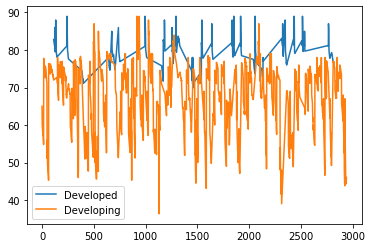

In [ ]:
#visualizing life expectancy for developing and developed countries
df.groupby('Status')['Life expectancy '].plot(legend=True)
#Life expectancy of developed countries takes a higher stand over  developing countries.

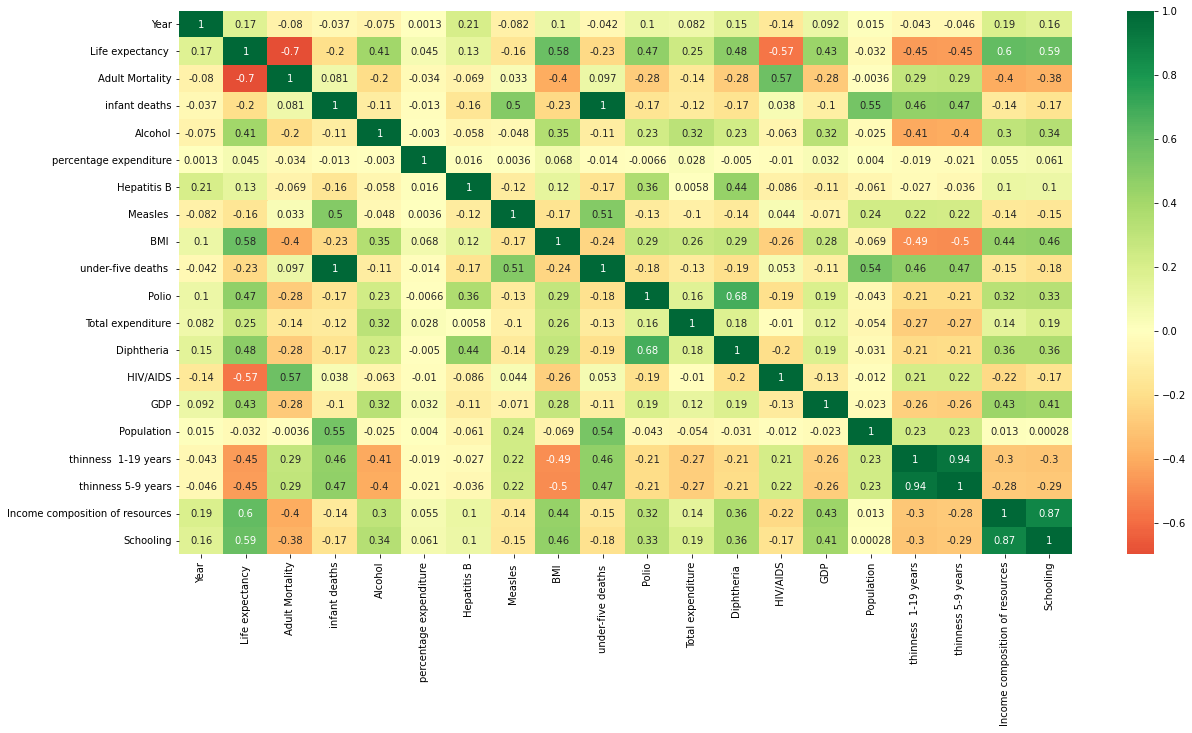

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True,ax=ax)

#this heat map indicates that infant deaths and under-five deaths are very highly correlated



1.  ## features like infant deaths and under-five deaths are highly correlated with each other.We will drop infant deaths.
2.   ## population is very less correlated with life expectancy.So we are dropping this column.



In [ ]:
df=df.drop('infant deaths',axis=1)
df=df.drop('Population',axis=1)
df=df.drop(' thinness 5-9 years',axis=1)
print(df)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   \
0        0.01               10.105348   

Text(0.5, 1.0, 'Overall/general view of LE over the years')

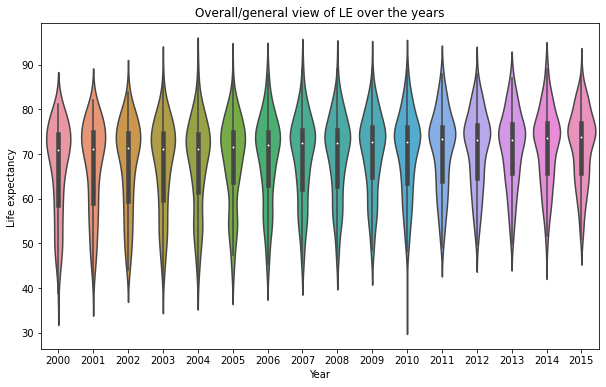

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df["Year"], y=df["Life expectancy "], data=df)
plt.title('Overall/general view of LE over the years')

From the above violin plot, its observed that median of life expectancy has slightly increased over the years and is more concentrated within the range of 70-80.

In [ ]:
year_expectancy=df.groupby('Year')['Life expectancy '].mean()

Year
2000    66.817127
2001    67.205525
2002    67.432044
2003    67.517127
2004    67.732597
2005    68.300000
2006    68.751934
2007    69.111602
2008    69.498343
2009    70.006077
2010    70.111602
2011    70.713260
2012    70.969613
2013    71.284530
2014    71.582320
2015    71.659116
Name: Life expectancy , dtype: float64


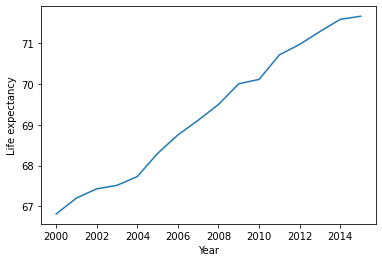

In [ ]:
print(year_expectancy)
#year_expectancy.plot.bar()
year_expectancy.plot(ylabel="Life expectancy")
# indicating that life expectancy increasing year by year from 2000 to 2015

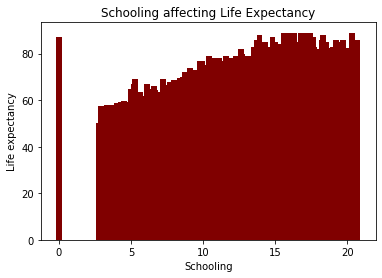

In [ ]:
# schooling influences life expectancy,which is indirectly indicating that country's development helps in increasing life expectancy
plt.bar( df['Schooling'],df['Life expectancy '], color ='maroon',width=0.4)
 
plt.xlabel("Schooling")
plt.ylabel("Life expectancy")
plt.title("Schooling affecting Life Expectancy")
plt.show()

In [ ]:
min_life_exp=df.loc[df.groupby('Year')['Life expectancy '].idxmin()]
min_life_exp

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
2312,Sierra Leone,2000,Developing,39.0,533.0,3.97,11.517329,63.0,3575,17.2,48,46.0,13.63,44.0,1.2,139.314773,1.3,0.292,6.7
2311,Sierra Leone,2001,Developing,41.0,519.0,4.21,10.972512,63.0,649,17.5,48,38.0,11.83,38.0,1.5,227.779471,1.1,0.302,7.0
1583,Malawi,2002,Developing,44.0,67.0,1.10,3.775870,64.0,92,14.8,75,79.0,4.82,64.0,24.7,29.979898,7.7,0.388,10.4
2309,Sierra Leone,2003,Developing,41.5,57.0,4.07,10.829052,63.0,586,18.4,47,66.0,11.69,73.0,1.9,263.761831,9.7,0.322,7.4
2308,Sierra Leone,2004,Developing,42.3,496.0,3.99,10.960553,63.0,7,18.8,47,69.0,11.66,65.0,2.1,263.145817,9.5,0.332,7.6
2307,Sierra Leone,2005,Developing,43.3,48.0,3.83,11.037729,63.0,29,19.2,47,67.0,12.25,65.0,2.2,287.689194,9.3,0.341,7.8
2306,Sierra Leone,2006,Developing,44.3,464.0,3.80,10.393990,63.0,33,19.7,46,65.0,1.68,64.0,2.2,322.313468,9.1,0.348,8.0
2305,Sierra Leone,2007,Developing,45.3,45.0,3.86,10.035162,63.0,0,2.2,45,63.0,1.12,64.0,2.2,358.827472,8.9,0.357,8.2
2304,Sierra Leone,2008,Developing,46.2,441.0,3.91,9.873871,77.0,44,2.7,44,75.0,1.29,77.0,1.9,46.375918,8.7,0.367,8.3
2303,Sierra Leone,2009,Developing,47.1,433.0,3.97,11.098478,84.0,31,21.2,42,81.0,13.13,84.0,1.7,394.593244,8.5,0.375,8.5


In [ ]:
min_life_exp.groupby('Country').size() #Countries with least LE and their no of occurrences

Country
Central African Republic     1
Haiti                        1
Malawi                       1
Sierra Leone                13
dtype: int64

All the countries with least life expectancy in the year of study(2000-2015) are observed to fall under developing countries.
Do observe that 3 of 4 of these countries belongs to Africa.
The reason can be inferred from maybe the economic- health and natural calamities that affected the respective countries during that time.
In Africa, AIDS epidemic, malnutrition, curable diseases, and civil strife have taken a tremendous toll on human life.
Sierra Leone has been in the record of least LE for about 13 time in the year 2000-2015.The reason maybe lack of clean water, proper food resources, education about hygiene and an extreme shortage of medical facilities and trained medical personnel as a result it has one of the highest child mortality rates in the world.
Haiti observed the drop in its life expectancy(36.3-Least so far in the year range 2000-2015) in the year 2010 becouse on 12 January of that year,it experienced a 7.0 magnitude earthquake, leaving its capital Port-au-Prince devastated. About 220,000 people were reportedly killed, among them, 102 United Nations staff who lost their lives when the building housing the mission there, known as MINUSTAH, collapsed.In short, Political instability,natural disaster lack of infrastructre and planning along with Epidemics and aid mismanagement has contributed towards its downfall. 


In [ ]:
max_life_exp=df.loc[df.groupby('Year')['Life expectancy '].idxmax()]
max_life_exp

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
1329,Japan,2000,Developed,81.1,74.0,7.97,7.034562,0.0,22497,22.2,5,98.0,7.53,85.0,0.1,38532.48800,1.6,0.852,14.5
2535,Switzerland,2001,Developed,82.0,75.0,11.12,9.439194,0.0,700,51.3,0,95.0,1.28,93.0,0.1,38538.64447,0.7,0.888,15.2
1183,Iceland,2002,Developed,84.0,7.0,6.61,9.465513,0.0,0,55.4,0,95.0,9.86,95.0,0.1,31996.21720,1.0,0.859,17.2
1182,Iceland,2003,Developed,87.0,65.0,6.61,9.729302,0.0,0,55.9,0,97.0,1.70,97.0,0.1,3944.99900,1.0,0.866,17.6
1293,Italy,2004,Developed,89.0,66.0,8.98,8.165493,96.0,599,57.6,3,97.0,8.49,94.0,0.1,31174.56118,0.5,0.846,15.6
1292,Italy,2005,Developed,88.0,66.0,8.65,8.339318,96.0,135,58.2,2,97.0,8.71,95.0,0.1,31959.26215,0.5,0.851,15.8
2434,Spain,2006,Developed,88.0,73.0,11.86,7.829127,97.0,362,61.1,2,98.0,8.23,98.0,0.1,28482.69480,0.6,0.844,15.9
938,France,2007,Developing,89.0,89.0,12.20,10.315644,42.0,39,58.6,3,99.0,1.45,98.0,0.1,416.58397,0.6,0.873,16.1
937,France,2008,Developing,89.0,88.0,11.90,10.500847,47.0,604,59.1,3,98.0,1.57,98.0,0.1,45413.65710,0.6,0.877,16.1
1916,Norway,2009,Developed,89.0,67.0,6.68,9.074315,0.0,2,58.5,0,94.0,9.49,94.0,0.1,817.77681,0.7,0.936,17.4


In [ ]:
max_life_exp.groupby('Country').size() #Countries with max LE and their no of occurrences 

Country
Austria        2
Belgium        2
France         2
Iceland        2
Italy          2
Japan          1
New Zealand    1
Norway         1
Slovenia       1
Spain          1
Switzerland    1
dtype: int64

Do note the status of the countries with maximum LE in the years 2000-2015 is developed.
Gains in life expectancy at birth can be attributed to a number of factors, including rising living standards, improved lifestyle and better education, as well as greater access to quality health services. 

**GROWTH OF LE IN COUNTRIES**

In [ ]:
new_df = df[['Year','Country','Life expectancy ','Status']].copy()
x=new_df['Country'].unique()
percent_change=[]
for i in range(len(x)):
  df3 = new_df[(df['Country'] == x[i])]
  df3=df3.sort_values('Year')
  df3['pdt_chg']=df3['Life expectancy '].pct_change()
  percent_change.append((df3['pdt_chg'].sum(),x[i]))
percent_change.sort(key = lambda x: x[0])
percent_change

[(-0.10933389688330597, 'Syrian Arab Republic'),
 (-0.07069647119561084, 'Saint Vincent and the Grenadines'),
 (-0.0655419888481441, 'Libya'),
 (-0.06010475791450742, 'Paraguay'),
 (-0.028652071969969994, 'Yemen'),
 (-0.022868631951561524, 'Romania'),
 (-0.0007156321832173518, 'Estonia'),
 (-0.0005262534720363865, 'Iraq'),
 (0.0016132277909516324, 'Brazil'),
 (0.0016818605261049724, 'Grenada'),
 (0.008962968518593017, 'Somalia'),
 (0.012271746521589022, 'Guyana'),
 (0.019331875361225048, 'Seychelles'),
 (0.02030202610589371, 'Kuwait'),
 (0.022024701077456688, 'Venezuela (Bolivarian Republic of)'),
 (0.02517729681655434, 'Mexico'),
 (0.0252152831346365, 'Philippines'),
 (0.025246736540392112, 'Uruguay'),
 (0.02585552034976557, 'Costa Rica'),
 (0.025864712176264737, 'Saudi Arabia'),
 (0.02594001730320228, 'Qatar'),
 (0.026223593600301687, 'Tonga'),
 (0.027481944436182126, 'Panama'),
 (0.027696574594815004, 'Nicaragua'),
 (0.028426426911953517, 'Cuba'),
 (0.02880044216554889, 'Dominican R

In [ ]:
new_df = df[['Year','Country','Life expectancy ']].copy()
x=new_df['Country'].unique()
df3 = new_df[(df['Country'] == "E")]
df3=df3.sort_values('Year')
df3['pdt_chg']=df3['Life expectancy '].pct_change()
df3['pdt_chg'].sum()

0.0

In [ ]:
'''    dfx = df.loc[df["Country"] == "Sierra Leone"]
    dfx = dfx[["Year", 'Life expectancy ']]
    dfx.index = dfx["Year"]
    dfx.drop("Year", axis=1, inplace=True)
    plt.figure(figsize=(2,2)) 
    dfx.plot(ylabel = 'Life expectancy ')
    plt.title("Siera Leone")'''

'    dfx = df.loc[df["Country"] == "Sierra Leone"]\n    dfx = dfx[["Year", \'Life expectancy \']]\n    dfx.index = dfx["Year"]\n    dfx.drop("Year", axis=1, inplace=True)\n    plt.figure(figsize=(2,2)) \n    dfx.plot(ylabel = \'Life expectancy \')\n    plt.title("Siera Leone")'

<Figure size 144x144 with 0 Axes>

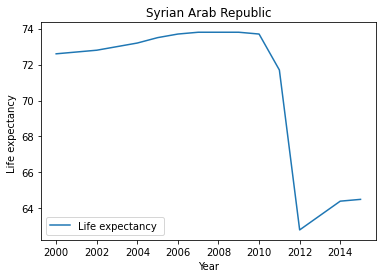

<Figure size 144x144 with 0 Axes>

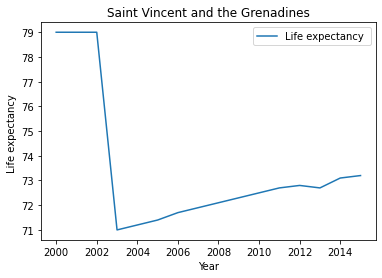

<Figure size 144x144 with 0 Axes>

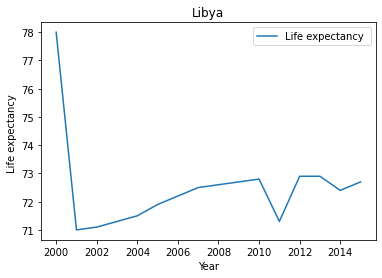

In [ ]:
least_change=[percent_change[0],percent_change[1],percent_change[2]]
for i in range(3):
    dfx = df.loc[df["Country"] == least_change[i][1]]
    dfx = dfx[["Year", 'Life expectancy ']]
    dfx.index = dfx["Year"]
    dfx.drop("Year", axis=1, inplace=True)
    plt.figure(figsize=(2,2)) 
    dfx.plot(ylabel = 'Life expectancy ')
    plt.title(least_change[i][1])

<Figure size 144x144 with 0 Axes>

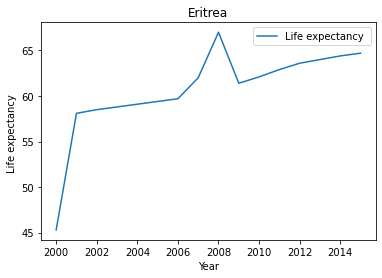

<Figure size 144x144 with 0 Axes>

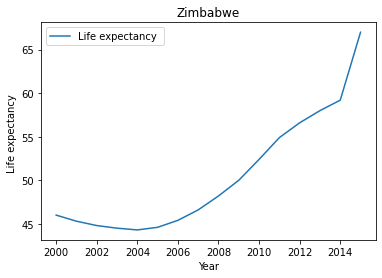

<Figure size 144x144 with 0 Axes>

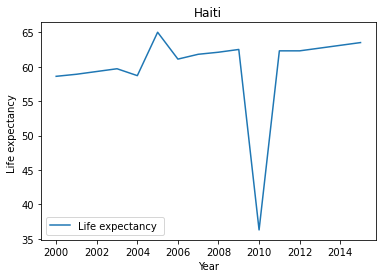

In [ ]:
max_change=[percent_change[len(percent_change)-1],percent_change[len(percent_change)-2],percent_change[len(percent_change)-3]]
for i in range(3):
    dfx = df.loc[df["Country"] == max_change[i][1]]
    dfx = dfx[["Year", 'Life expectancy ']]
    dfx.index = dfx["Year"]
    dfx.drop("Year", axis=1, inplace=True)
    plt.figure(figsize=(2,2)) 
    dfx.plot(ylabel = 'Life expectancy ')
    plt.title(max_change[i][1])

Observe: the le of the countries with maximum change are developing countries.
le of countries with least change are having le around 75.

<Figure size 144x144 with 0 Axes>

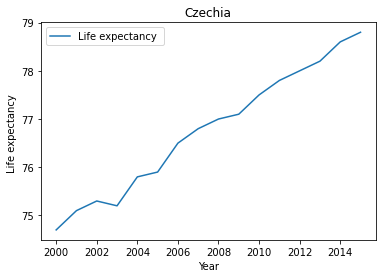

<Figure size 144x144 with 0 Axes>

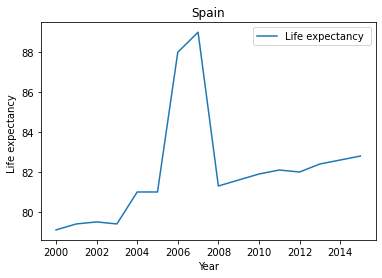

<Figure size 144x144 with 0 Axes>

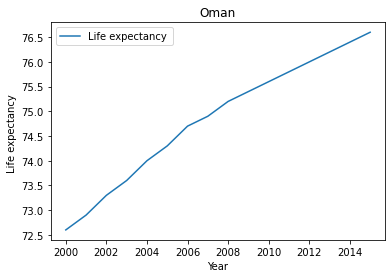

In [ ]:
len(percent_change)#Odd
mid_value=int((len(percent_change)+1)/2)#91
middle_change=[percent_change[mid_value],percent_change[mid_value-1],percent_change[mid_value+1]]
for i in range(3):
    dfx = df.loc[df["Country"] == middle_change[i][1]]
    dfx = dfx[["Year", 'Life expectancy ']]
    dfx.index = dfx["Year"]
    dfx.drop("Year", axis=1, inplace=True)
    plt.figure(figsize=(2,2)) 
    dfx.plot(ylabel = 'Life expectancy ')
    plt.title(middle_change[i][1])

In [ ]:
df.groupby("Country")[" HIV/AIDS"].mean().sort_values(ascending=False)

Country
Zimbabwe        23.26250
Lesotho         22.96875
South Africa    18.49375
Malawi          16.68125
Botswana        16.52500
                  ...   
Iceland          0.10000
Hungary          0.10000
Grenada          0.10000
Greece           0.10000
Latvia           0.10000
Name:  HIV/AIDS, Length: 181, dtype: float64

African counties have higher average cases of HIV over the years

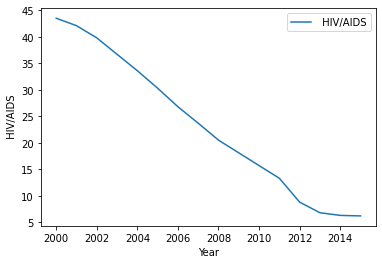

In [ ]:
df_zim = df.loc[df["Country"] == "Zimbabwe"]
df_zim = df_zim[["Year", " HIV/AIDS"]]
df_zim.index = df_zim["Year"]
df_zim.drop("Year", axis=1, inplace=True)
df_zim.plot(ylabel = " HIV/AIDS")

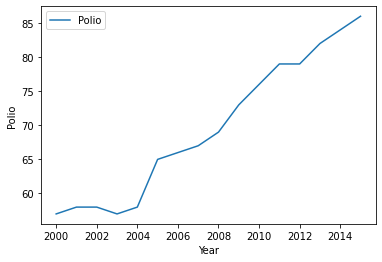

In [ ]:
# Polio immunization in India
df_ind = df.loc[df["Country"] == "India"]
df_ind = df_ind[["Year", "Polio"]]
df_ind.index = df_ind["Year"]
df_ind.drop("Year", axis=1, inplace=True)
df_ind.plot(ylabel = "Polio")

Around 2002, there was a resurgence in Polio cases due to a cutback in the number of large scale SIAs, combined with ongoing immunization gaps in some areas. 

As is visible, the immunizations have been steadily rising, with 100% immunization achieved a few years ago, thus effectively eradicating Polio from the country.

**OUTLIER ANALYSIS**

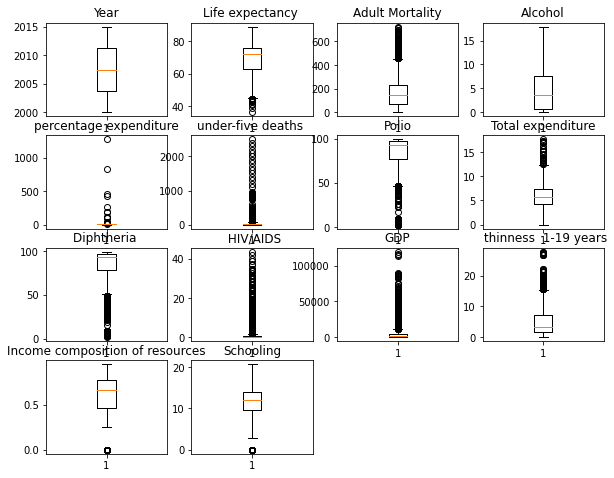

In [ ]:
col=['Year', 'Life expectancy ','Adult Mortality', 'Alcohol', 'percentage expenditure','under-five deaths ','Polio', 'Total expenditure','Diphtheria ', ' HIV/AIDS', 'GDP',' thinness  1-19 years','Income composition of resources', 'Schooling']
plt.figure(figsize=(10,10))
for i in range(0,len(col)):
   plt.subplot(5, 4, i+1)
   plt.boxplot(df[col[i]])
   plt.title(col[i])

From the above boxplot, adult mortality,infant deaths,percentage expenditure, under-five deaths, polio,population, dipheria, hiv-aids,gdp,schooling,thinness(1-19,5-9) have considerably high amount of outliers.

In [ ]:
'''US = df[df['Country'] == "United States of America"]
print(US.loc[:, ["Year", "infant deaths"]])
fig = plt.figure()
ax = plt.axes()
ax.plot(US["Year"], US["infant deaths"])'''
#plt.scatter(y = US["infant deaths"], x = US["Year"])

'US = df[df[\'Country\'] == "United States of America"]\nprint(US.loc[:, ["Year", "infant deaths"]])\nfig = plt.figure()\nax = plt.axes()\nax.plot(US["Year"], US["infant deaths"])'

1.   percentage expenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%) 
2.   Total expenditure - General government expenditure on health as a percentage of total government expenditure (%)


#**Lasso regression**

In [ ]:
##lasso regression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X, y = df.drop(['Life expectancy ','Country','Status', 'Year'],axis=1), df['Life expectancy ']
#
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

In [ ]:
model=Lasso()
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
param = {
    'alpha':np.arange(1,2,0.05),
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'positive':[True,False],
    'selection':['cyclic','random'],
    }
search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

In [ ]:
result = search.fit(X_sc, y)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -3.572660875057828
Best Hyperparameters: {'alpha': 1.0, 'fit_intercept': True, 'normalize': False, 'positive': False, 'selection': 'random'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [ ]:
#based on above result selecting the value of alpha
import math
model = Lasso(alpha=1,fit_intercept= True, positive= False, selection = 'random')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("r2 score: ", r2_score(y_test,y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print(model.coef_)
#print(classification_report(y_test,y_pred))
#

r2 score:  0.7441848202591929
RMSE:  4.8682243218176025
[-2.74476438  0.62293743  0.          0.         -0.          1.09904586
 -0.          0.57093738  0.          0.77068261 -1.87451963  0.45284172
 -0.50003781  1.05225253  0.65733529]


In [ ]:
#get important features
coeff=model.coef_
j=0
for i in df.columns:
  if i!='Life expectancy ' and i!='Country' and i!='Status' and i!='Year':
    if(coeff[j]!=0):
      print(i)
    j=j+1

Adult Mortality
Alcohol
 BMI 
Polio
Diphtheria 
 HIV/AIDS
GDP
 thinness  1-19 years
Income composition of resources
Schooling


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
def ridge_regression(alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(X_train, y_train)
    y_pred = ridgereg.predict(X_train)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(X_train,y_pred)
        plt.plot(X_train,y_train,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-y_train)**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

In [ ]:
from sklearn.linear_model import Ridge

ridgereg = Ridge(alpha=0.1,normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print("r2 score: ", r2_score(y_test,y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))
print(ridgereg.coef_)
    

r2 score:  0.7733110337114966
RMSE:  4.582712550907315
[-2.64677372  0.95555966  0.03005687 -0.19987089 -0.22390112  1.16220465
 -0.15219998  0.94767622  0.25548184  1.01027325 -2.45941677  0.87836378
 -0.70179556  1.07436319  0.81875673]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


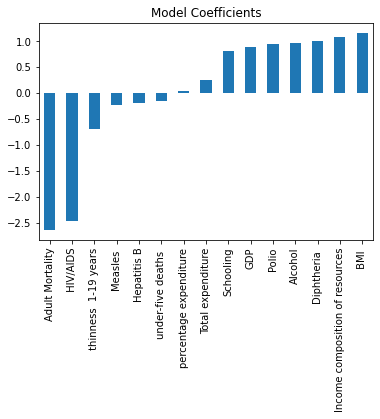

In [ ]:

predictors = X.columns

coef = pd.Series(ridgereg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients')

The relevant features considering a minimum threshold of coefficient value of +0.5 and -0.5, are Adult Mortality, Income composition of resources, HIV/AIDS, BMI, thinness 1-19 years, Diphtheria, Polio, Alcohol, GDP, Schooling and percentage expenditure.

#**Life expectancy in India**

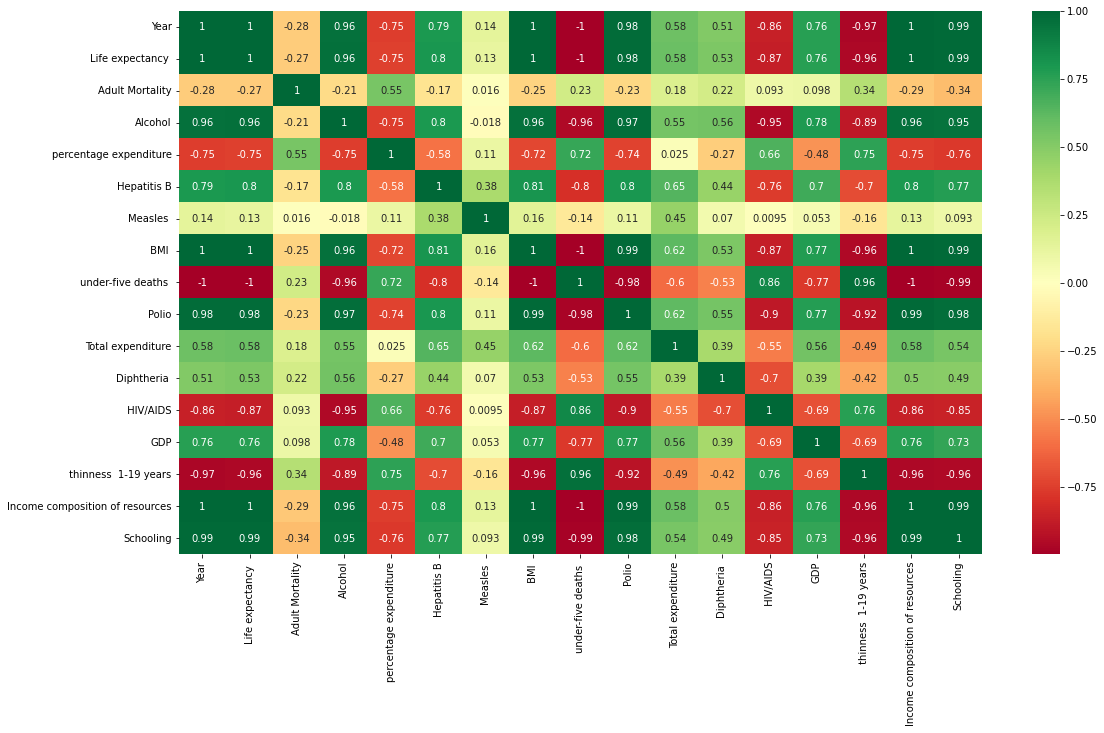

In [ ]:
df_india=df.loc[df['Country']=='India']
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(df_india.corr(), xticklabels=df_india.corr().columns, yticklabels=df_india.corr().columns, cmap='RdYlGn', center=0, annot=True,ax=ax)
#this indicates that LE in India is highly influenced by factors like infant deaths,alcohol consumption,bmi,under five deaths,polio,hiv/aids,income compositon of resources,schooling and thinness

#**MLR MODEL**

In [ ]:
X, y = df.drop(['Life expectancy ','Year','under-five deaths ','Hepatitis B','Measles ','Total expenditure'],axis=1), df.loc[:,['Life expectancy ']]

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 501 kB/s 


In [ ]:
import category_encoders as ce
#using binary encoding for countries
encoder = ce.BinaryEncoder(cols=['Country'])
X = encoder.fit_transform(X)
#using one hot encoding for status as there are only 2 classes
X = pd.get_dummies(X, columns = ['Status'])
#print(X)

In [ ]:
# splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
predictions_linear=regressor.predict(scaler.transform(X_test))
#print(predictions_linear)

In [ ]:
from sklearn.metrics import mean_squared_error
import math
MSE_lr = mean_squared_error(y_test,predictions_linear)
RMSE_lr = math.sqrt(MSE_lr)
print("Root Mean Square Error of regression model:\n")
print(RMSE_lr)
print("r2 score: ", r2_score(y_test,predictions_linear))

Root Mean Square Error of regression model:

4.528213738540613
r2 score:  0.7786706625981058


Text(0, 0.5, 'Predictions ')

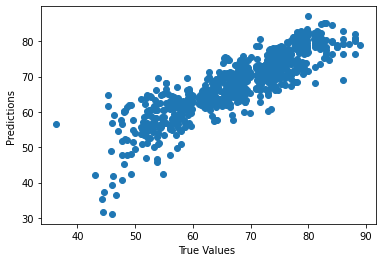

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')


##**XGboost**

In [ ]:
x_scale=StandardScaler()
y_scale=StandardScaler()

In [ ]:
X_train_scaled=x_scale.fit_transform(X_train)
y_train_scaled=y_scale.fit_transform(y_train)

In [ ]:
#building the xgboost model

import xgboost as xgb
 
# fit the model
xgb_le = xgb.XGBRegressor()
xgb_le.fit(X_train_scaled, y_train_scaled)
 
#predicting the values
preds_xgb = xgb_le.predict(x_scale.transform(X_test))
preds_xgb=y_scale.inverse_transform(preds_xgb.reshape(len(preds_xgb),1))

[10:49:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
MSE_xgb = mean_squared_error(y_test,preds_xgb)
RMSE_xgb = math.sqrt(MSE_xgb)
print("Root Mean Square Error of xgboost model:\n")
print(RMSE_xgb)
print("r2 score: ", r2_score(y_test,preds_xgb))

Root Mean Square Error of xgboost model:

2.20396285455613
r2 score:  0.9475683301777622


##**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_le = RandomForestRegressor(n_estimators=100,random_state=10)
rf_le.fit(X_train_scaled, y_train_scaled)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=10)

In [ ]:
#predicting the values
preds_rf = rf_le.predict(x_scale.transform(X_test))
preds_rf = y_scale.inverse_transform(preds_rf.reshape(len(preds_rf),1))

In [ ]:
MSE_rf = mean_squared_error(y_test,preds_rf)
RMSE_rf = math.sqrt(MSE_rf)
print("Root Mean Square Error of random forest regressor model:\n")
print(RMSE_rf)
print("r2 score: ", r2_score(y_test,preds_rf))

Root Mean Square Error of random forest regressor model:

1.8962688553899076
r2 score:  0.961186306486399


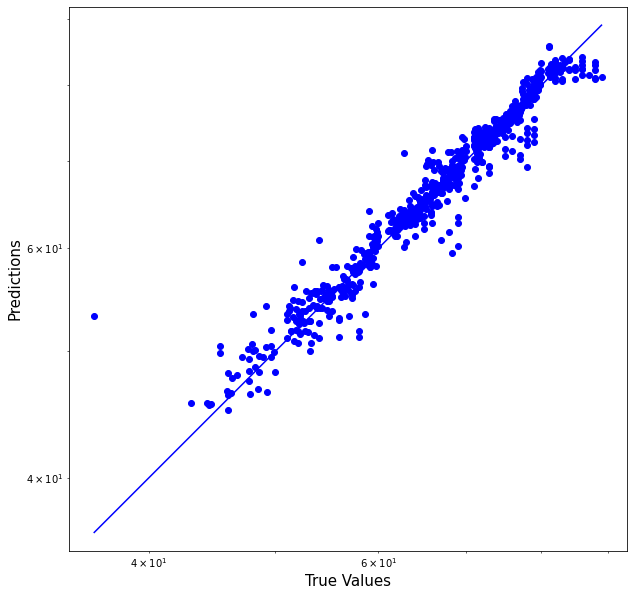

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, preds_rf, c='blue')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(preds_rf), max(y_test["Life expectancy "]))
p2 = min(min(preds_rf), min(y_test["Life expectancy "]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##**PCA** 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
numeric_data= df._get_numeric_data() 
numeric_data.isna().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
y = numeric_data['Life expectancy ']
X= numeric_data.drop('Life expectancy ',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
sc = StandardScaler()
pca = PCA()
X_red = pca.fit_transform(sc.fit_transform(X))
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)

array([ 27.06,  37.43,  47.04,  54.66,  61.76,  68.03,  74.  ,  78.58,
        82.96,  86.37,  89.62,  92.82,  95.2 ,  97.32,  99.23, 100.01])

Thus around 8 or 9 dimensions should give approximately the overall picture.

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(sc.transform(X_test))

In [ ]:
print (pca.explained_variance_ratio_)

[0.26944448 0.10278142 0.09414968 0.07400933 0.0713109 ]


In [ ]:
print('Original Number of Features', X_train.shape[1]) 
print('Reduced Number of Features',X_train_pca.shape[1])

Original Number of Features 16
Reduced Number of Features 5


In [ ]:
X_train_pca

array([[-1.77479964,  0.39970886, -0.66104494,  0.55925685,  1.5860865 ],
       [-0.34307543,  0.99301364, -0.62038889, -0.21133632,  0.57019953],
       [ 1.3892895 , -1.73045029, -0.40922659, -0.28391352,  1.12915667],
       ...,
       [ 2.29790678,  2.19972133, -1.28480975, -1.86232011, -0.80537771],
       [-2.11195308,  0.31129475, -0.50763591,  0.28813043,  1.33265338],
       [ 2.82245975, -2.16072363, -0.39512683, -0.03168234,  0.91807207]])

In [ ]:
# Applying MLR on the reduced dimensions
lm = LinearRegression()
pcr = lm.fit(X_train_pca, y_train)
y_pred = pcr.predict(X_test_pca)
print("r2 score: ", r2_score(y_test,y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

r2 score:  0.7658459306878664
RMSE:  4.6575580977650946


In [ ]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = sc.fit_transform(X_train)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(sc.transform(X_test))
# Applying MLR on the reduced dimensions
lm = LinearRegression()
pcr = lm.fit(X_train_pca, y_train)
y_pred = pcr.predict(X_test_pca)
print("r2 score: ", r2_score(y_test,y_pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred)))

r2 score:  0.7664337586300272
RMSE:  4.651708181825936


Text(0, 0.5, 'Predictions ')

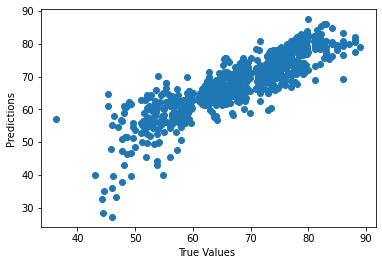

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')


## Analysis of features influencing LE in developing and developed countries

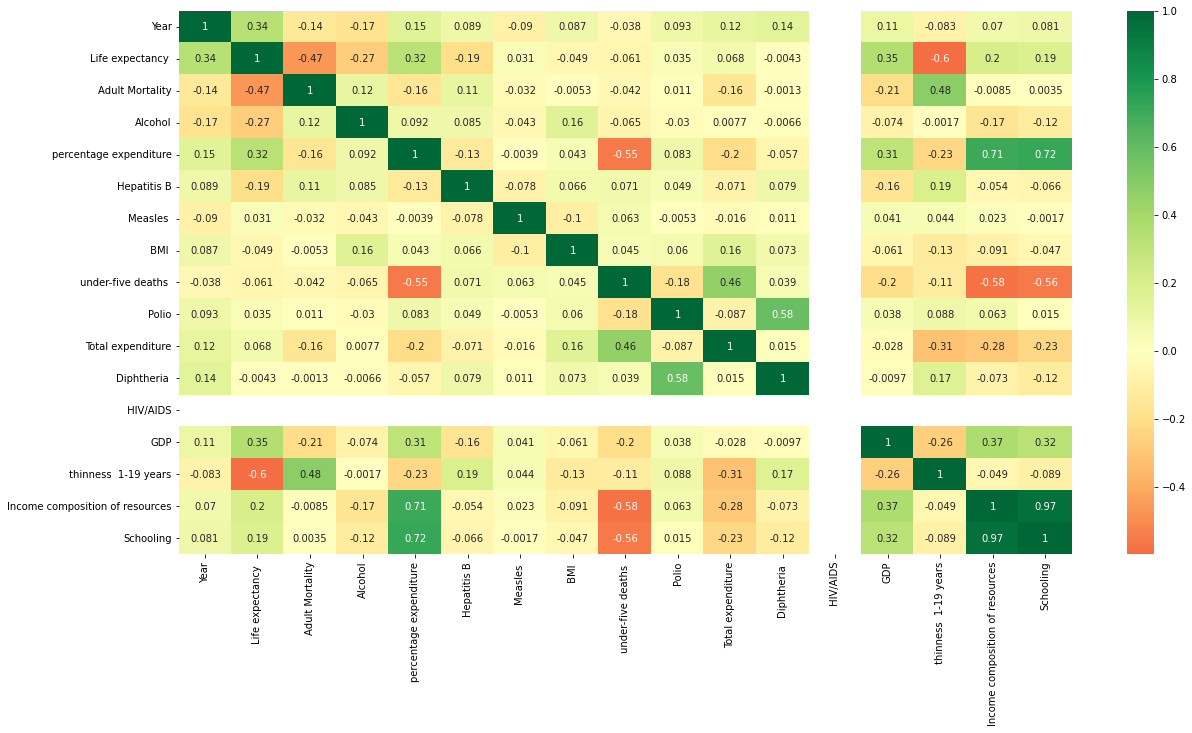

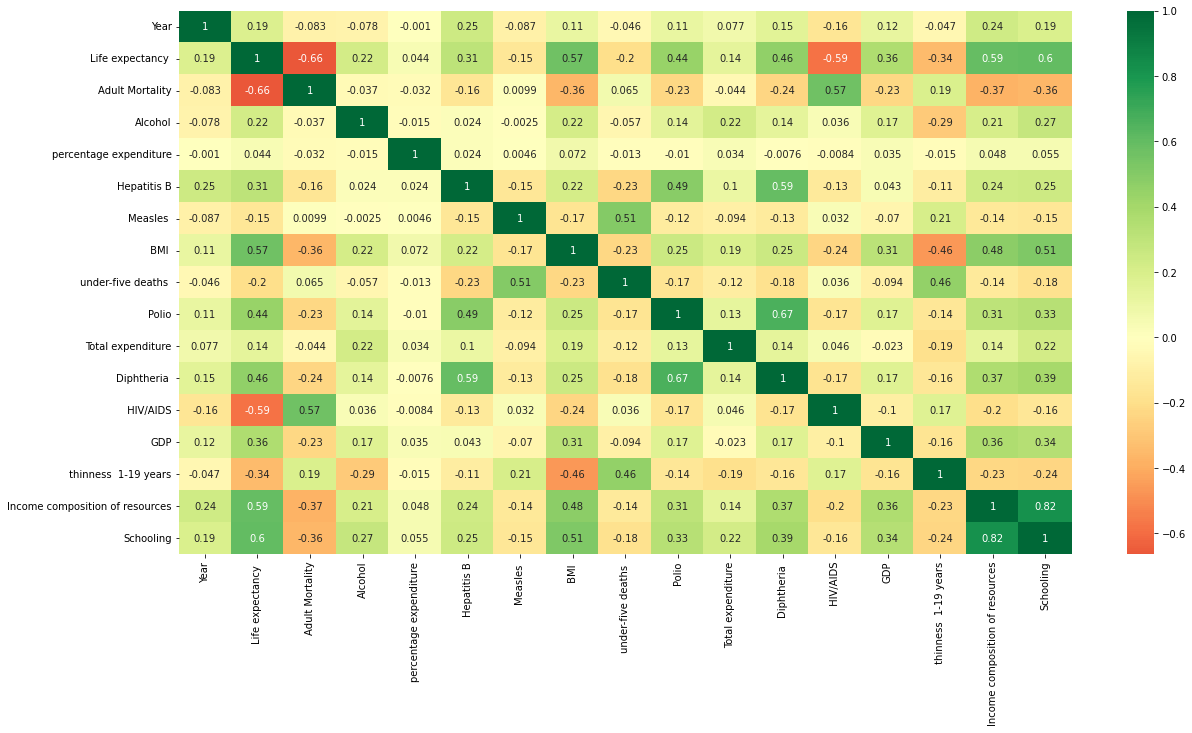

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10))
df_developed = df[df["Status"] == "Developed"]
sns.heatmap(df_developed.corr(), xticklabels=df_developed.corr().columns, yticklabels=df_developed.corr().columns, cmap='RdYlGn', center=0, annot=True,ax=ax)
fig, ax = plt.subplots(figsize=(20,10))
df_developing = df[df["Status"] == "Developing"]
sns.heatmap(df_developing.corr(), xticklabels=df_developing.corr().columns, yticklabels=df_developing.corr().columns, cmap='RdYlGn', center=0, annot=True,ax=ax)

Issues to be addressed:
1. HIV/AIDS in developed countries is constant at 0.1

Developing: LE and BMI are positively correlated. Polio, HIV and Diphtheria influence the LE as well.

In [ ]:
# XGBoost (developed):
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
X_d, y_d = df_developed.drop(['Year','Life expectancy ','Country','Status'],axis=1), df_developed['Life expectancy ']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, test_size=0.2, random_state=123)
xg_reg.fit(X_train,y_train)

[10:49:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10)

In [ ]:
import shap
shap.initjs()

In [ ]:
#Get shap values
explainer = shap.Explainer(xg_reg)
shap_values = explainer(X_train)

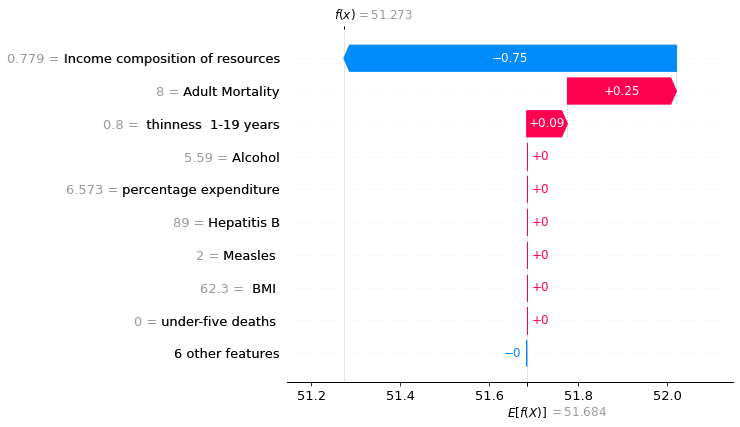

In [ ]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

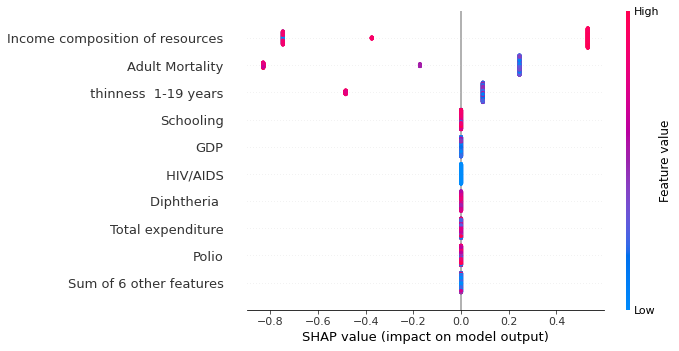

In [ ]:
shap.plots.beeswarm(shap_values)

[10:49:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


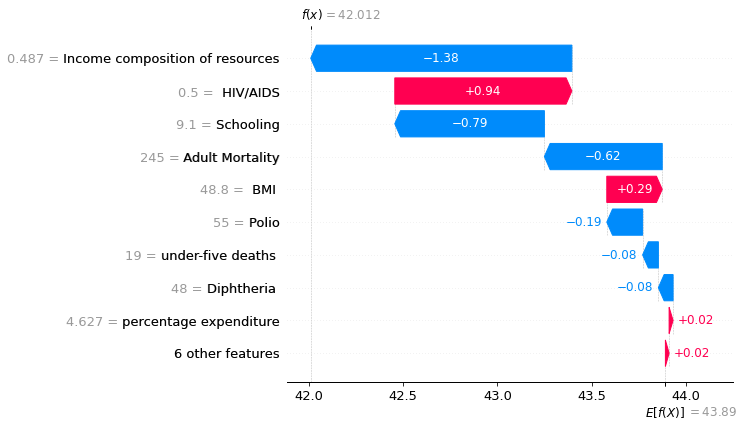

In [ ]:
# Developing:
xg_reg_2 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
X_g, y_g = df_developing.drop(['Year','Life expectancy ','Country','Status'],axis=1), df_developing['Life expectancy ']
X_traing, X_testg, y_traing, y_testg = train_test_split(X_g, y_g, test_size=0.2, random_state=123)
xg_reg_2.fit(X_traing,y_traing)
#Get shap values
explainer = shap.Explainer(xg_reg_2)
shap_values = explainer(X_traing)
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

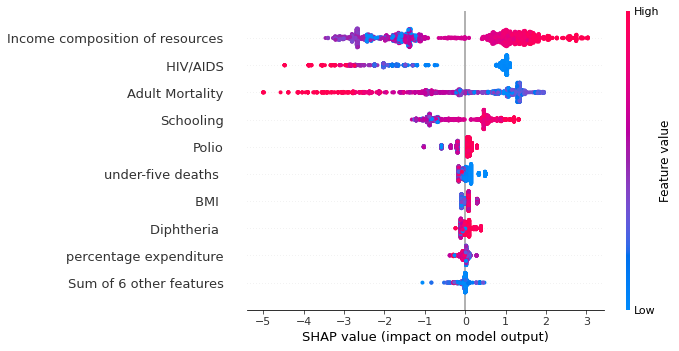

In [ ]:
shap.plots.beeswarm(shap_values)

Features to be considered:
Developed nations - Income composition of resources, Adult Mortality, thinness 1-19 years

Developing nations - Income composition of resources, HIV/AIDS, Schooling, Adult Mortality, BMI, Polio

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
count,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000,2896.000000
mean,2007.500000,69.293301,164.092196,4.472788,6.520517,71.918854,2454.410221,37.808218,42.624309,82.178867,5.849420,81.970994,1.584461,6428.511487,4.807424,0.592400,11.332804
std,4.610568,9.467591,123.259910,4.066010,31.448585,32.372497,11546.479189,20.278779,161.530050,23.718756,2.569861,23.962028,4.377205,13485.924184,4.438852,0.250653,4.261947
min,2000.000000,36.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,2003.750000,63.275000,74.000000,0.600000,3.199651,62.000000,0.000000,18.900000,0.000000,77.000000,4.200000,78.000000,0.100000,233.089869,1.600000,0.464000,9.500000
50%,2007.500000,72.100000,144.000000,3.525000,5.115101,88.000000,18.000000,43.000000,4.000000,93.000000,5.690000,93.000000,0.100000,1212.913749,3.300000,0.662000,12.100000
75%,2011.250000,75.700000,227.000000,7.570000,7.505497,96.000000,375.000000,56.100000,29.000000,97.000000,7.442500,97.000000,0.800000,4870.666705,7.200000,0.771250,14.100000
max,2015.000000,89.000000,723.000000,17.870000,1275.877569,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,43.500000,119172.741800,27.700000,0.948000,20.700000


In [ ]:
df_developed.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
print(len(df_developed))
print(len(df_developing))

496
2400


In [ ]:
print(len(df_developed.groupby("Country")))
print(len(df_developing.groupby("Country")))

31
150


In [ ]:
# MLR for both developed and developing nations
from sklearn.preprocessing import StandardScaler
X_dd, y_dd = df_developed[["Income composition of resources", "Adult Mortality", " thinness  1-19 years"]], df_developed["Life expectancy "]
X_train_dd, X_test_dd, y_train_dd, y_test_dd = train_test_split(X_dd, y_dd, test_size=0.3, random_state=42)
scaler_dd = StandardScaler()
X_train_dd= scaler_dd.fit_transform(X_train_dd)
from sklearn.linear_model import LinearRegression
regressordd=LinearRegression()
regressordd.fit(X_train_dd,y_train_dd)
predictions_dd = regressordd.predict(scaler_dd.transform(X_test_dd))


In [ ]:
from sklearn.metrics import mean_squared_error
import math
MSE_dd = mean_squared_error(y_test_dd,predictions_dd)
RMSE_dd = math.sqrt(MSE_dd)
print("Root Mean Square Error of regression model:\n")
print(RMSE_dd)
print("r2 score: ", r2_score(y_test_dd,predictions_dd))

Root Mean Square Error of regression model:

2.814386904826129
r2 score:  0.4522393020869496


In [ ]:
# Developing countries
from sklearn.preprocessing import StandardScaler
X_dg, y_dg = df_developing[["Income composition of resources", " HIV/AIDS", "Schooling", "Adult Mortality", " BMI ", "Polio", "GDP"]], df_developing["Life expectancy "]
X_train_dg, X_test_dg, y_train_dg, y_test_dg = train_test_split(X_dg, y_dg, test_size=0.3, random_state=42)
scaler_dg = StandardScaler()
X_train_dg= scaler_dg.fit_transform(X_train_dg)
from sklearn.linear_model import LinearRegression
regressordg=LinearRegression()
regressordg.fit(X_train_dg,y_train_dg)
predictions_dg = regressordg.predict(scaler_dg.transform(X_test_dg))


In [ ]:
from sklearn.metrics import mean_squared_error
import math
MSE_dg = mean_squared_error(y_test_dg,predictions_dg)
RMSE_dg = math.sqrt(MSE_dg)
print("Root Mean Square Error of regression model:\n")
print(RMSE_dg)
print("r2 score: ", r2_score(y_test_dg,predictions_dg))

Root Mean Square Error of regression model:

4.605251437499743
r2 score:  0.7500940944008637


In [ ]:
# Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50,random_state=10)
rf.fit(X_train_dd, y_train_dd)

RandomForestRegressor(n_estimators=50, random_state=10)

In [ ]:
#predicting the values
preds_rf_dd = rf.predict(scaler_dd.transform(X_test_dd))
MSE_dd = mean_squared_error(y_test_dd,preds_rf_dd)
RMSE_dd = math.sqrt(MSE_dd)
RMSE_dd_train = math.sqrt(mean_squared_error(y_train_dd,rf.predict(X_train_dd)))
print("Root Mean Square Error of random forest model (training) for developed countries:")
print(RMSE_dd_train)
print("r2 score: ", r2_score(y_train_dd,rf.predict(X_train_dd)))
print("Root Mean Square Error of random forest model for developed countries:\n")
print(RMSE_dd)
print("r2 score: ", r2_score(y_test_dd,preds_rf_dd))

Root Mean Square Error of random forest model (training) for developed countries:
0.6861664949146756
r2 score:  0.9696960691680385
Root Mean Square Error of random forest model for developed countries:

1.8527821538837532
r2 score:  0.7626047727905525


In [ ]:
rf = RandomForestRegressor(n_estimators=100,random_state=10)
rf.fit(X_train_dg, y_train_dg)
preds_rf_dg = rf.predict(scaler_dg.transform(X_test_dg))
MSE_dg = mean_squared_error(y_test_dg,preds_rf_dg)
RMSE_dg = math.sqrt(MSE_dg)
print("Root Mean Square Error of random forest model for developing countries:\n")
print(RMSE_dg)
print("r2 score: ", r2_score(y_test_dg,preds_rf_dg))

RMSE_dg_train = math.sqrt(mean_squared_error(y_train_dg,rf.predict(X_train_dg)))
print("Root Mean Square Error of random forest model (training) for developing countries:")
print(RMSE_dg_train)
print("r2 score: ", r2_score(y_train_dg,rf.predict(X_train_dg)))

Root Mean Square Error of random forest model for developing countries:

1.9398764744465322
r2 score:  0.9556577242797921
Root Mean Square Error of random forest model (training) for developing countries:
0.7559638010198515
r2 score:  0.9926311002679514


# Country wise analysis


In [ ]:
#as 10 life-expectancy values are missing,those corresponding rows are dropped
df = df.dropna(subset=['Life expectancy '])
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
years = df['Year'].unique().tolist()   #find unique values
years.sort()
print(years,len(years))
# Average LE of 2011-2015
years_5 = df[df['Year'].isin([2011, 2012, 2013, 2014, 2015])]

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015] 16


In [ ]:
years_5.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,10.105348,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,9.528871,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,8.805941,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,7.897176,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,8.561907,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,0.454,9.5
16,Albania,2015,Developing,77.8,74.0,4.60,4.896312,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,1.2,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,4.51,5.503473,98.0,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,1.2,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,4.76,5.385611,99.0,0,56.5,1,99.0,5.66,99.0,0.1,4414.723140,1.3,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,5.14,5.055265,99.0,9,55.8,1,99.0,5.59,99.0,0.1,4247.614380,1.3,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,5.37,4.795341,99.0,28,55.1,1,99.0,5.71,99.0,0.1,4437.178680,1.4,0.738,13.3


In [ ]:
avg_LE = years_5.groupby('Country')['Life expectancy '].mean()
avg_LE = avg_LE.sort_values()

In [ ]:
avg_LE

Country
Sierra Leone     50.34
Chad             52.26
Côte d'Ivoire    52.42
Angola           52.44
Lesotho          52.48
                 ...  
Slovenia         84.36
Belgium          84.62
Greece           84.80
Finland          84.82
Germany          85.40
Name: Life expectancy , Length: 181, dtype: float64

In [ ]:
max_counts = avg_LE[:3]
print(max_counts)
min_counts = avg_LE[180:]
print(min_counts)

Country
Sierra Leone     50.34
Chad             52.26
Côte d'Ivoire    52.42
Name: Life expectancy , dtype: float64
Country
Germany    85.4
Name: Life expectancy , dtype: float64


In [ ]:
# AND India!!!

df_India = df.loc[df["Country"]== "India"]

In [ ]:
df_India

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
1186,India,2015,Developing,68.3,181.0,3.07,3.595660,87.0,90387,18.7,1100,86.0,4.69,87.0,0.2,1613.188780,26.7,0.615,11.6
1187,India,2014,Developing,68.0,184.0,3.07,3.619565,79.0,79563,18.1,1200,84.0,4.69,85.0,0.2,1573.118890,26.8,0.607,11.6
1188,India,2013,Developing,67.6,187.0,3.11,3.749442,7.0,13822,17.5,1300,82.0,4.53,83.0,0.2,1452.195373,26.8,0.599,11.5
1189,India,2012,Developing,67.3,19.0,3.10,3.329353,73.0,18668,17.0,1400,79.0,4.39,82.0,0.2,1446.985410,26.9,0.590,11.3
1190,India,2011,Developing,66.8,193.0,3.00,3.246342,44.0,33634,16.4,1500,79.0,4.33,82.0,0.2,1461.671957,26.9,0.580,10.8
1191,India,2010,Developing,66.4,196.0,2.77,3.272119,38.0,31458,15.9,1600,76.0,4.28,79.0,0.2,1345.771530,27.0,0.569,10.4
1192,India,2009,Developing,66.0,2.0,2.50,3.485379,37.0,56188,15.4,1700,73.0,4.38,74.0,0.2,19.317765,27.0,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1.93,3.514681,29.0,44258,14.9,1800,69.0,4.34,7.0,0.3,991.484634,27.0,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1.59,3.517542,6.0,41144,14.4,1900,67.0,4.23,64.0,0.3,118.166373,27.1,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1.37,3.634778,6.0,64185,13.9,2000,66.0,4.25,65.0,0.3,792.259698,27.1,0.536,9.7


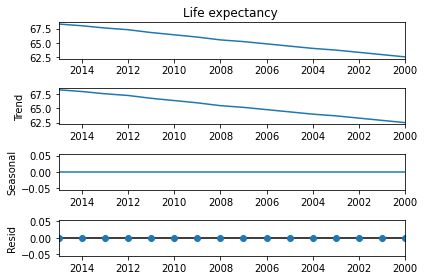

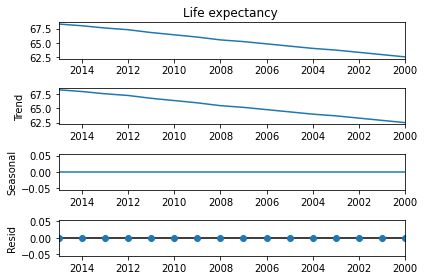

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_India.index = df_India["Year"]
components = seasonal_decompose(df_India['Life expectancy '], period=1)
components.plot()